In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('wandb.csv')
df = df[["method", "n_epochs", "batch_size", "Hit@1"]]
names = df["method"].unique()

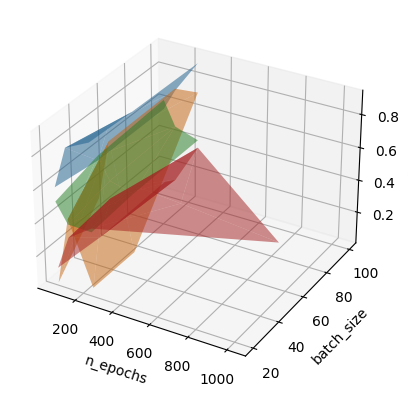

In [24]:
# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for name in names:
    data = df[df["method"] == name]
    y = data["n_epochs"]
    x = data["batch_size"]
    z = data["Hit@1"]

    # plot the trisurf if there are at least 3 data points
    if len(x) >= 3 and len(y) >= 3 and len(z) >= 3:
        ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True, label=name, alpha=0.5)

ax.set_xlabel('n_epochs')
ax.set_ylabel('batch_size')
ax.set_zlabel('Hit@1')
plt.show()
